<a href="https://colab.research.google.com/github/chandra-sekar-1983/clustering/blob/master/Clustering_Alogrithm_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 


In [0]:
data=pd.read_csv("/content/clustering.csv")

In [101]:
data.head()

,X,Y
0,2,2
1,-5,-5
2,0,0
3,5,5
4,-2,-2


Split X and y

In [0]:
x="X"
y="Y"


In [0]:
data=pd.read_csv("/content/clustering_2.csv")
data.head()
x="ApplicantIncome"
y="LoanAmount"

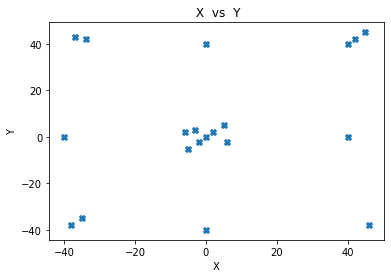

In [104]:
plt.scatter(data[x],data[y],marker='X')
plt.xlabel(x)
plt.ylabel(y)
plt.title(f" {x}  vs  {y}")
#plt.xticks([100,1000])
plt.show()

**Steps for K-Means algorithm**



In [105]:
x=data[x].values.reshape(-1,1)
x.ndim



2

In [106]:
y=data[y].values.reshape(-1,1)
y.ndim


2

In [0]:
col=["X","Y"]
data=data[col]

In [108]:
n_clusters=3
kmeans=KMeans(n_clusters=n_clusters)

## fit the data
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [109]:
kmeans.inertia_

12472.987179487178

In [110]:
kmeans.cluster_centers_

array([[ 41.75      ,  31.75      ],
       [ -5.38461538, -11.38461538],
       [-23.66666667,  41.66666667]])

In [0]:

# Running K-means with different K values

In [0]:
sse=[]
cluster=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i)

  ## fit the data
  kmeans.fit(x,y)
  inertia=kmeans.inertia_
  sse.append(round(inertia,2))
  cluster.append(i)


In [113]:
print(sse)
print(cluster)

[16004.2, 4632.93, 192.1, 100.1, 67.17, 39.13, 21.5, 12.83, 8.67]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [0]:
## Plotting elbow curve

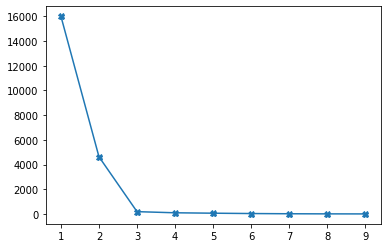

In [116]:

plt.plot(cluster,sse,marker='X')


#plt.xticks([100,1000])
plt.show()


3 clusters seems to be ideal for this data.Let's look at where the centroid lies.

In [120]:
n_clusters=2
kmeans=KMeans(n_clusters=n_clusters)

## fit the data
kmeans.fit(data)
kmeans.cluster_centers_

array([[ 42.6       ,  17.8       ],
       [-12.46666667,   1.        ]])

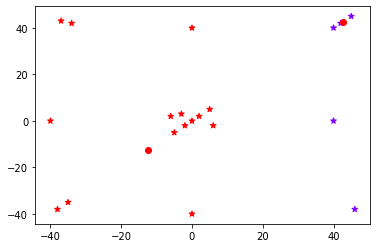

In [140]:
## Plotting the data with centroids
plt.scatter(x,y,marker='*',c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0],marker='o',color='red')
plt.show()

Text(0, 0.5, 'Feature 1')

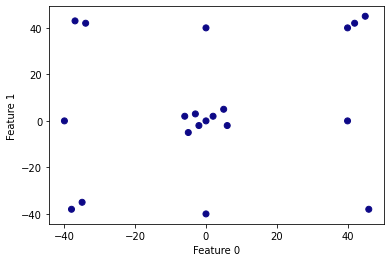

In [194]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(data)
# plot the cluster assignments
plt.scatter(x,y, c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [191]:
## Plotting the data with centroids
plt.scatter(x,y,marker='*',c=db.labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0],marker='o',color='red')
plt.show()

AttributeError: ignored

**1.K Means performs well when the data is linearly seperable**


**1.K Means performs well when the data is linearly seperable**


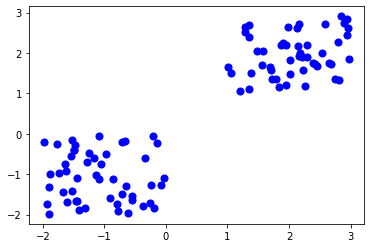

In [145]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [146]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [147]:
Kmean.cluster_centers_


array([[-1.09127537, -1.06794521],
       [ 2.08045896,  1.95228117]])

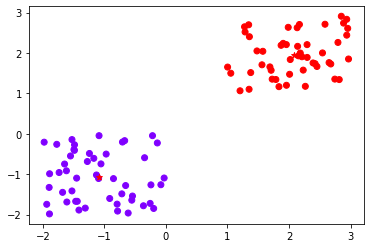

In [150]:
## Plotting the data with centroids
plt.scatter(X[ : , 0], X[ :, 1],c=Kmean.labels_, cmap='rainbow')
plt.scatter(Kmean.cluster_centers_[:,0],Kmean.cluster_centers_[:,1],marker='*',color='red')
plt.show()

**2) Effect of outliers**

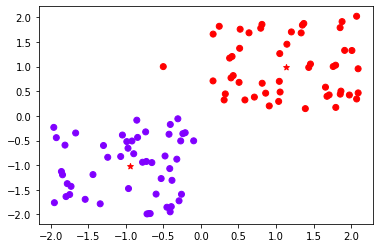

In [180]:
X= -2 * np.random.rand(100,2)
X1 = .1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
X[50:51, :]=-0.5,1
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2,init='random')
Kmean.fit(X)

## Plotting the data with centroids
plt.scatter(X[ : , 0], X[ :, 1],c=Kmean.labels_, cmap='rainbow')
plt.scatter(Kmean.cluster_centers_[:,0],Kmean.cluster_centers_[:,1],marker='*',color='red')
plt.show()

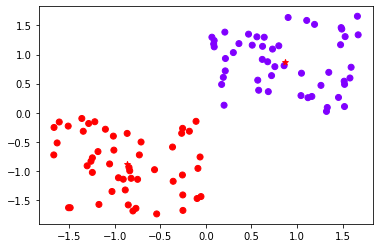

In [185]:
X= -2 * np.random.rand(100,2)+30
X1 = .1 + 2 * np.random.rand(50,2)+30
X[50:100, :] = X1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2,init='random')
Kmean.fit(X)

## Plotting the data with centroids
plt.scatter(X[ : , 0], X[ :, 1],c=Kmean.labels_, cmap='rainbow')
plt.scatter(Kmean.cluster_centers_[:,0],Kmean.cluster_centers_[:,1],marker='*',color='red')
plt.show()